In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [135]:
df = pd.read_csv("scores.csv", index_col=None)

In [136]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [137]:
df = df.replace(" ", np.NaN) #replacing empty with NaN

In [138]:
df_condition = df[df.number.str.contains("condition")].copy(deep = True) #splitting df into condition and control
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [139]:
df_control = df[df.number.str.contains("control")].copy(deep = True).reset_index(drop = True)
df_control_cleaned = df_control.drop(columns=["afftype", "melanch", "inpatient", "edu", "marriage", "work", "madrs1", "madrs2"])
gender_mapping = {1.0: 'female', 2.0: 'male'}
df_control_cleaned['gender'] = df_control_cleaned['gender'].map(gender_mapping)
df_control_cleaned['gender'] = df_control_cleaned['gender'].astype('category')
df_control_cleaned['age'] = df_control_cleaned['age'].astype('category')
df_control_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   number  32 non-null     object  
 1   days    32 non-null     int64   
 2   gender  32 non-null     category
 3   age     32 non-null     category
dtypes: category(2), int64(1), object(1)
memory usage: 1.2+ KB


In [140]:
df_condition_cleaned = df.dropna().reset_index(drop = True) # cleaning condition by removing rows with NaN

In [141]:
categories = ["gender", 'age', 'afftype', 'melanch', 'inpatient','edu', 'marriage', 'work']
for i in categories: # changing types to Category of categorical data 
    df_condition_cleaned[i] = df_condition_cleaned[i].astype("category")
df_condition_cleaned

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
7,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
8,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
9,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


In [142]:
category_mappings = {
    'gender': {1.0: 'female', 2.0: 'male'},
    'afftype': {1.0: 'bipolar II', 2.0: 'unipolar', 3: 'bipolar I'},
    'melanch': {1.0: 'melancholia', 2.0: 'No melancholia'},
    'inpatient': {1.0: 'inpatient', 2.0: 'outpatient'},
    'marriage': {1.0: 'married', 2.0: 'single'},
    'work': {1.0: 'work/study', 2.0: 'not working'}
}
for column, mapping in category_mappings.items():
    df_condition_cleaned[column] = df_condition_cleaned[column].cat.rename_categories(mapping) #renaming categories



In [143]:

df_condition_cleaned1 = df_condition_cleaned.copy(deep = True)
df_control_cleaned1 = df_control_cleaned.copy(deep = True) 
df_condition_cleaned1["group"] = "condition"
df_control_cleaned1["group"] = "control"

common_columns = df_condition_cleaned1.columns.intersection(df_control_cleaned1.columns)
appended_df = pd.concat([df_condition_cleaned1[common_columns], df_control_cleaned1[common_columns]], ignore_index=True)




In [144]:
df_condition_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   number     19 non-null     object  
 1   days       19 non-null     int64   
 2   gender     19 non-null     category
 3   age        19 non-null     category
 4   afftype    19 non-null     category
 5   melanch    19 non-null     category
 6   inpatient  19 non-null     category
 7   edu        19 non-null     category
 8   marriage   19 non-null     category
 9   work       19 non-null     category
 10  madrs1     19 non-null     float64 
 11  madrs2     19 non-null     float64 
dtypes: category(8), float64(2), int64(1), object(1)
memory usage: 2.1+ KB


In [145]:
df_control_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   number  32 non-null     object  
 1   days    32 non-null     int64   
 2   gender  32 non-null     category
 3   age     32 non-null     category
dtypes: category(2), int64(1), object(1)
memory usage: 1.2+ KB


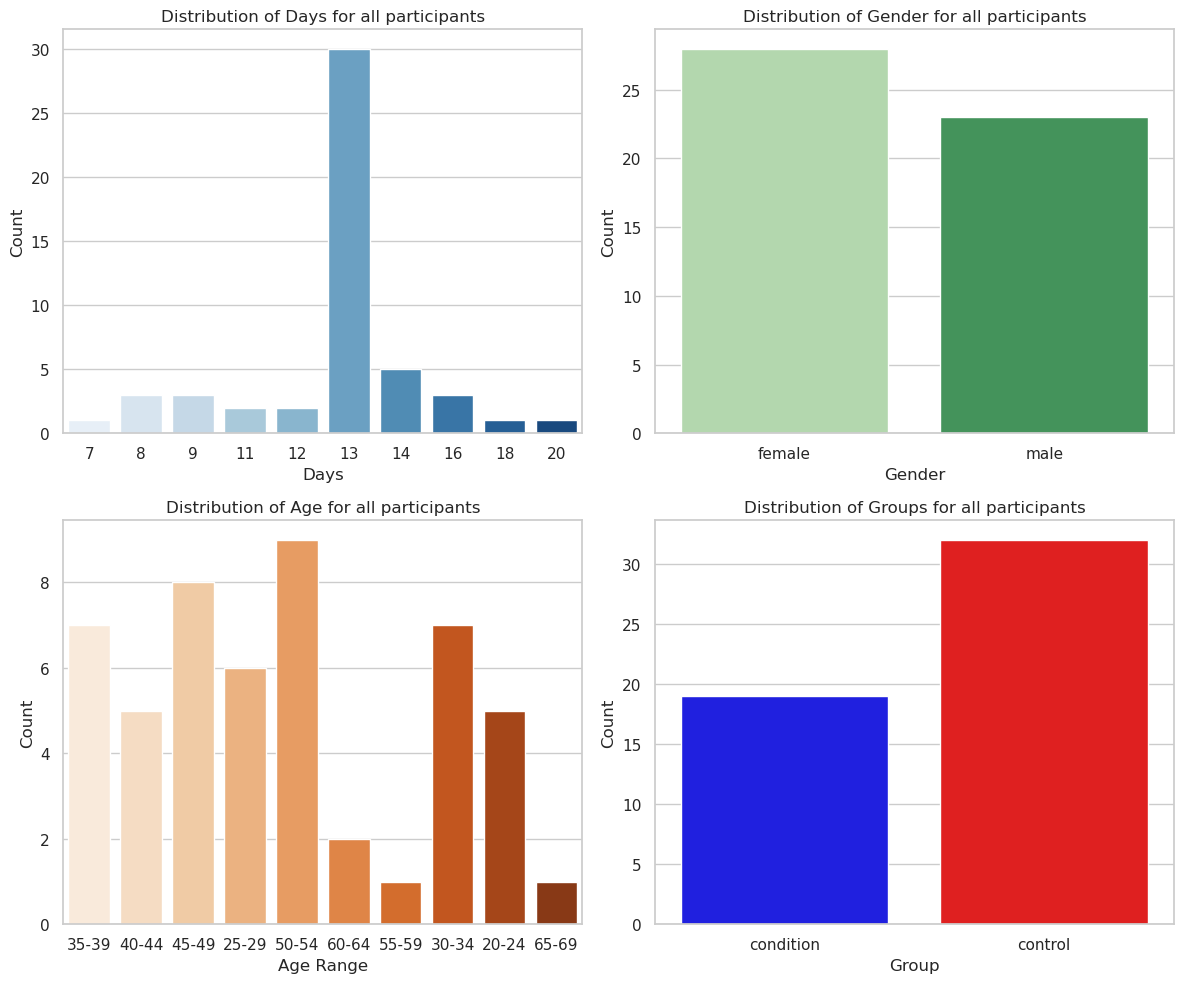

In [146]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(data=appended_df, x='days', palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Days for all participants')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Count')

sns.countplot(data=appended_df, x='gender', palette='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Gender for all participants')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

sns.countplot(data=appended_df, x='age', palette='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Age for all participants')
axes[1, 0].set_xlabel('Age Range')
axes[1, 0].set_ylabel('Count')

sns.countplot(data=appended_df, x='group', palette=['Blue', 'Red'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Groups for all participants')
axes[1, 1].set_xlabel('Group')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


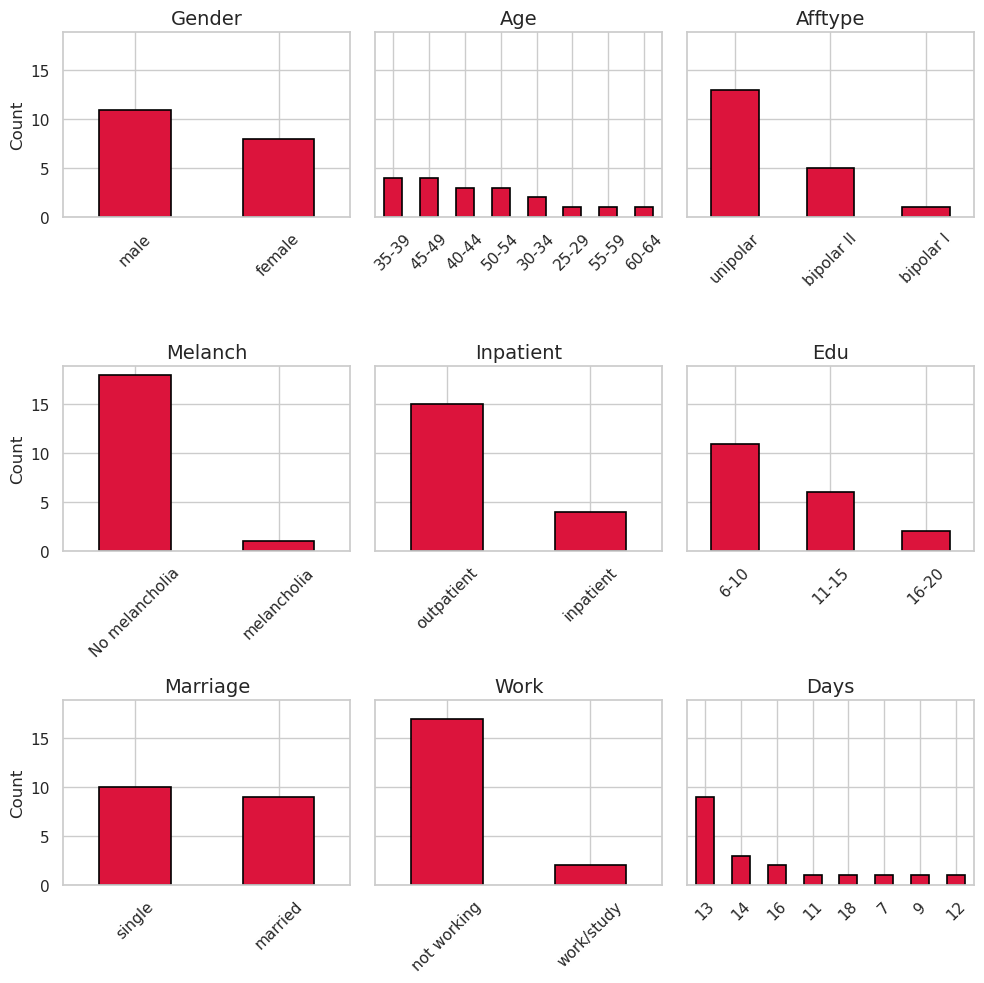

In [147]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), sharey=True)
axes = axes.flatten()

for i, column in enumerate(categories + ["days"]):
    ax = axes[i]
    counts = df_condition_cleaned[column].value_counts()
    counts.plot(kind='bar', ax=ax, color='crimson', edgecolor='black', linewidth=1.2)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{column.capitalize()}', fontsize=14)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


In [148]:
df_condition_cleaned["average_madrs"] = (df_condition_cleaned["madrs2"] + df_condition_cleaned["madrs1"])/2

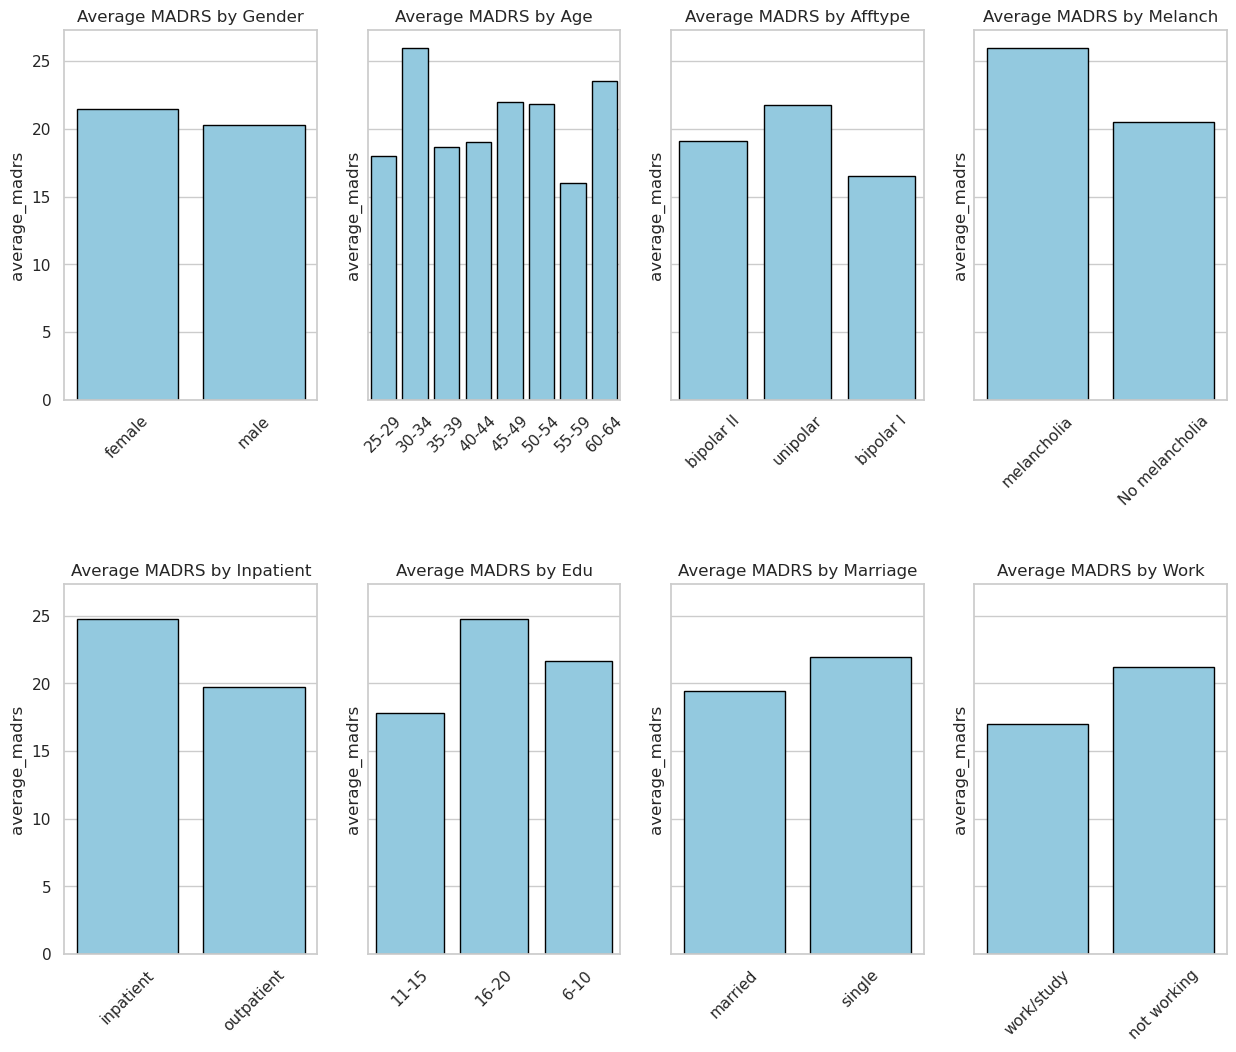

In [149]:

import math

num_categories = len(categories)
num_cols = 4  
num_rows = math.ceil(num_categories / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows), sharey=True)
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, category in enumerate(categories):
    average_madrs1_by_category = df_condition_cleaned.groupby(category)['average_madrs'].mean().reset_index()
    
    sns.barplot(x=category, y='average_madrs', data=average_madrs1_by_category, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Average MADRS by {category.capitalize()}')
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)



plt.show()


In [150]:

df_condition_cleaned["average activity"] = 0.0

condition_folder = "condition"

for file_name in os.listdir(condition_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(condition_folder, file_name)
        df = pd.read_csv(file_path)
        
        average_activity = df['activity'].mean()
        
        condition_index = df_condition_cleaned[df_condition_cleaned['number']==  file_name[:-4]].index
        df_condition_cleaned.loc[condition_index, 'average activity'] = average_activity


df_condition_cleaned


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,average_madrs,average activity
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,6-10,married,not working,19.0,19.0,19.0,146.948030
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,not working,24.0,11.0,17.5,153.664748
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,6-10,single,not working,24.0,25.0,24.5,265.299704
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,11-15,married,work/study,20.0,16.0,18.0,274.866998
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,11-15,single,not working,26.0,26.0,26.0,167.245987
5,condition_6,7,female,35-39,unipolar,No melancholia,outpatient,6-10,married,not working,18.0,15.0,16.5,196.416414
6,condition_10,9,male,45-49,unipolar,No melancholia,outpatient,6-10,married,not working,28.0,21.0,24.5,289.647228
7,condition_11,14,female,45-49,unipolar,No melancholia,outpatient,6-10,married,not working,24.0,24.0,24.0,129.383036
8,condition_12,12,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,not working,25.0,21.0,23.0,151.444846
9,condition_13,14,male,35-39,bipolar II,No melancholia,outpatient,11-15,single,not working,18.0,13.0,15.5,221.348746


In [151]:

df_control_cleaned["average activity"] = 0.0

control_folder = "Control"

for file_name in os.listdir(control_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(control_folder, file_name)
        
        df = pd.read_csv(file_path)
        
        average_activity = df['activity'].mean()
        
        control_index = df_control_cleaned[df_control_cleaned['number'] == file_name[:-4]].index
        df_control_cleaned.loc[control_index, 'average activity'] = average_activity

df_control_cleaned


,number,days,gender,age,average activity
0,control_1,8,male,25-29,98.545078
1,control_2,20,female,30-34,398.883456
2,control_3,12,male,30-34,77.011207
3,control_4,13,female,25-29,138.161055
4,control_5,13,female,30-34,133.886343
5,control_6,13,female,25-29,152.296614
6,control_7,13,female,20-24,162.922975
7,control_8,13,male,40-44,290.488104
8,control_9,13,male,30-34,107.266651
9,control_10,8,female,30-34,280.409097


In [152]:
print(df_control_cleaned["average activity"].mean(), "control")
print(df_condition_cleaned["average activity"].mean(), "condition")

208.65312289017828 control
156.7513533832073 condition


In [153]:
print("Control Group Summary:")
print(df_control_cleaned["average activity"].describe())

print("\nCondition Group Summary:")
print(df_condition_cleaned["average activity"].describe())


Control Group Summary:
count     32.000000
mean     208.653123
std       84.644786
min       68.251613
25%      151.094106
50%      197.826873
75%      278.753804
max      398.883456
Name: average activity, dtype: float64

Condition Group Summary:
count     19.000000
mean     156.751353
std       70.710178
min       54.697992
25%       97.688121
50%      151.444846
75%      199.517751
max      289.647228
Name: average activity, dtype: float64


In [154]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_control_cleaned["average activity"], df_condition_cleaned["average activity"])

print("T-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-Test Results:
T-statistic: 2.245412223521022
P-value: 0.02928654890602073


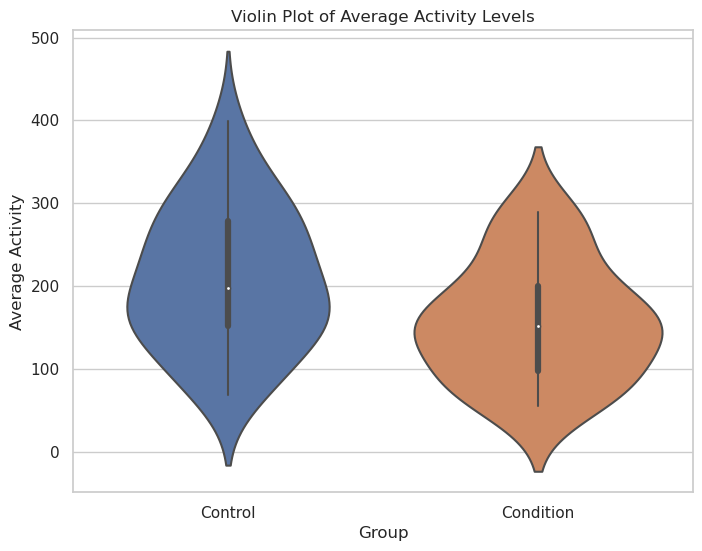

In [155]:

df_control_cleaned['Group'] = 'Control'
df_condition_cleaned['Group'] = 'Condition'

combined_df = pd.concat([df_control_cleaned, df_condition_cleaned])

sns.set(style="whitegrid")  # Set the style of the visualization
plt.figure(figsize=(8, 6))  # Set the size of the figure

sns.violinplot(x="Group", y="average activity", data=combined_df)

plt.title("Violin Plot of Average Activity Levels")
plt.xlabel("Group")
plt.ylabel("Average Activity")

plt.show()


In [156]:
from statistics import mean, stdev

def cohen_d(group1, group2):
    pooled_std = ((stdev(group1) ** 2 + stdev(group2) ** 2) / 2) ** 0.5
    return (mean(group1) - mean(group2)) / pooled_std

effect_size = cohen_d(df_control_cleaned["average activity"], df_condition_cleaned["average activity"])
print(f"Cohen's d: {effect_size}")


Cohen's d: 0.6654983949071398


In [157]:
df_control_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   number            32 non-null     object  
 1   days              32 non-null     int64   
 2   gender            32 non-null     category
 3   age               32 non-null     category
 4   average activity  32 non-null     float64 
 5   Group             32 non-null     object  
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [158]:
df_condition_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   number            19 non-null     object  
 1   days              19 non-null     int64   
 2   gender            19 non-null     category
 3   age               19 non-null     category
 4   afftype           19 non-null     category
 5   melanch           19 non-null     category
 6   inpatient         19 non-null     category
 7   edu               19 non-null     category
 8   marriage          19 non-null     category
 9   work              19 non-null     category
 10  madrs1            19 non-null     float64 
 11  madrs2            19 non-null     float64 
 12  average_madrs     19 non-null     float64 
 13  average activity  19 non-null     float64 
 14  Group             19 non-null     object  
dtypes: category(8), float64(4), int64(1), object(2)
memory usage: 2.5+ KB


In [159]:
all_participants = pd.concat([df_control_cleaned, df_condition_cleaned[["number", "days", "gender", "age", "average activity"]]], ignore_index = True)
all_participants['age'] = all_participants.age.astype("category")
all_participants


,number,days,gender,age,average activity,Group
0,control_1,8,male,25-29,98.545078,Control
1,control_2,20,female,30-34,398.883456,Control
2,control_3,12,male,30-34,77.011207,Control
3,control_4,13,female,25-29,138.161055,Control
4,control_5,13,female,30-34,133.886343,Control
5,control_6,13,female,25-29,152.296614,Control
6,control_7,13,female,20-24,162.922975,Control
7,control_8,13,male,40-44,290.488104,Control
8,control_9,13,male,30-34,107.266651,Control
9,control_10,8,female,30-34,280.409097,Control


In [160]:
all_participants["depression"] = np.where(all_participants["number"].str.contains("control"), "no depression", "depressed")

In [161]:
all_participants.depression = all_participants.depression.astype("category")
all_participants

,number,days,gender,age,average activity,Group,depression
0,control_1,8,male,25-29,98.545078,Control,no depression
1,control_2,20,female,30-34,398.883456,Control,no depression
2,control_3,12,male,30-34,77.011207,Control,no depression
3,control_4,13,female,25-29,138.161055,Control,no depression
4,control_5,13,female,30-34,133.886343,Control,no depression
5,control_6,13,female,25-29,152.296614,Control,no depression
6,control_7,13,female,20-24,162.922975,Control,no depression
7,control_8,13,male,40-44,290.488104,Control,no depression
8,control_9,13,male,30-34,107.266651,Control,no depression
9,control_10,8,female,30-34,280.409097,Control,no depression


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



X = all_participants[['gender', 'age', 'average activity']]
y = all_participants['depression']

X = pd.get_dummies(X, columns=['gender', 'age'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_str)


Accuracy: 0.8181818181818182
Classification Report:
                precision    recall  f1-score   support

    depressed       0.75      0.75      0.75         4
no depression       0.86      0.86      0.86         7

     accuracy                           0.82        11
    macro avg       0.80      0.80      0.80        11
 weighted avg       0.82      0.82      0.82        11



In [163]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

    depressed       0.50      0.75      0.60         4
no depression       0.80      0.57      0.67         7

     accuracy                           0.64        11
    macro avg       0.65      0.66      0.63        11
 weighted avg       0.69      0.64      0.64        11



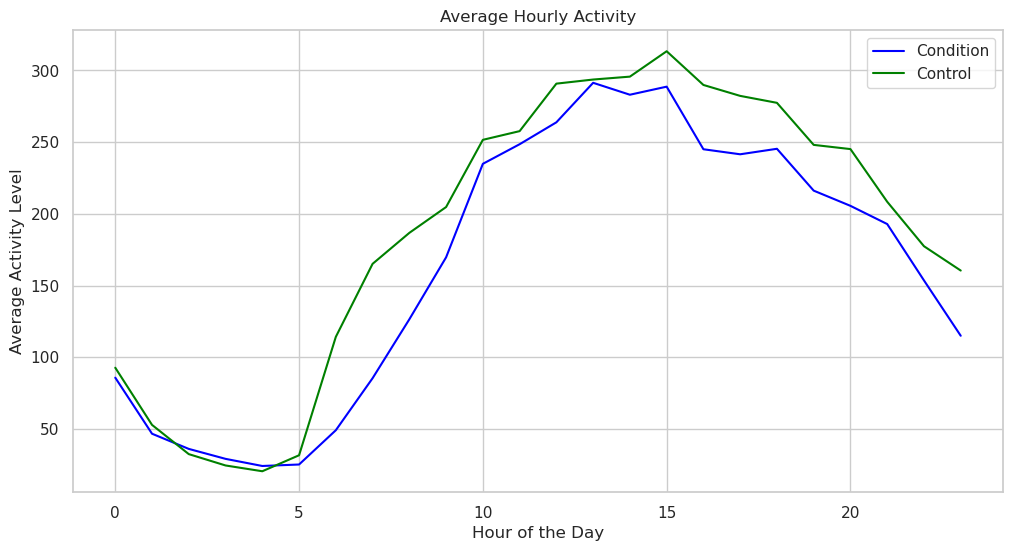

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

condition_files = glob.glob('condition/*.csv')
control_files = glob.glob('Control/*.csv')

def calculate_hourly_average(files):
    df_combined = pd.concat([pd.read_csv(file) for file in files])
    
    df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'])
    
    df_combined['hour'] = df_combined['timestamp'].dt.hour
    
    hourly_average = df_combined.groupby('hour')['activity'].mean()
    
    return hourly_average

hourly_average_condition = calculate_hourly_average(condition_files)
hourly_average_control = calculate_hourly_average(control_files)

plt.figure(figsize=(12, 6))
plt.plot(hourly_average_condition.index, hourly_average_condition.values, label='Condition', color='blue')
plt.plot(hourly_average_control.index, hourly_average_control.values, label='Control', color='green')
plt.title('Average Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Activity Level')
plt.legend()
plt.show()


In [165]:
"""df_condition_cleaned['age'] = df_condition_cleaned['age'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))

# Convert "edu" to a numeric value (e.g., taking the midpoint of the range)
df_condition_cleaned['edu'] = df_condition_cleaned['edu'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))

df_condition_cleaned['edu'] = df_condition_cleaned.edu.astype("float64")
df_condition_cleaned['age'] = df_condition_cleaned.age.astype("float64")"""

'df_condition_cleaned[\'age\'] = df_condition_cleaned[\'age\'].apply(lambda x: int((int(x.split(\'-\')[0]) + int(x.split(\'-\')[1])) / 2) if \'-\' in x else int(x))\n\n# Convert "edu" to a numeric value (e.g., taking the midpoint of the range)\ndf_condition_cleaned[\'edu\'] = df_condition_cleaned[\'edu\'].apply(lambda x: int((int(x.split(\'-\')[0]) + int(x.split(\'-\')[1])) / 2) if \'-\' in x else int(x))\n\ndf_condition_cleaned[\'edu\'] = df_condition_cleaned.edu.astype("float64")\ndf_condition_cleaned[\'age\'] = df_condition_cleaned.age.astype("float64")'

In [166]:
"""selected_columns = ['age', 'edu', 'average_madrs', 'average activity']
df_selected = df_condition_cleaned[selected_columns]

# Calculate correlation coefficients
correlation_matrix = df_selected.corr()

# Assuming correlation_matrix is your correlation matrix
sns.set(style="white")  # Set the style of the visualization
plt.figure(figsize=(10, 8))  # Set the size of the figure

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Display the plot
plt.show()"""

'selected_columns = [\'age\', \'edu\', \'average_madrs\', \'average activity\']\ndf_selected = df_condition_cleaned[selected_columns]\n\n# Calculate correlation coefficients\ncorrelation_matrix = df_selected.corr()\n\n# Assuming correlation_matrix is your correlation matrix\nsns.set(style="white")  # Set the style of the visualization\nplt.figure(figsize=(10, 8))  # Set the size of the figure\n\n# Create a heatmap using seaborn\nsns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)\n\n# Display the plot\nplt.show()'

In [167]:


X = df_condition_cleaned.drop("afftype", axis=1)
y = df_condition_cleaned["afftype"]

X['age'] = X['age'].apply(lambda x: sum(map(int, x.split('-')))/2)

edu_mapping = {"6-10": 8, "11-15": 13, "16-20": 18}
X['edu'] = X['edu'].map(edu_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ["age", "madrs1", "madrs2", "average_madrs", "average activity"]
numeric_transformer = StandardScaler()

categorical_features = ["gender", "melanch", "inpatient", "marriage", "work"]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # added handle_unknown to ignore unseen categories

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

feature_names = (numeric_features +
                 list(model.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .get_feature_names_out(categorical_features)))

if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    feature_importances = model.named_steps['classifier'].feature_importances_
    importance_dict = dict(zip(feature_names, feature_importances))
    
    print("\nFeature Importances:")
    for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {importance}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.75

Feature Importances:
average activity: 0.2205339288427493
madrs2: 0.1894054524317226
average_madrs: 0.17095427192698276
madrs1: 0.12893061146794776
age: 0.09211654748845202
marriage_single: 0.038527930946949444
inpatient_outpatient: 0.035678444586535844
marriage_married: 0.03350649721272124
gender_male: 0.03043370719495698
gender_female: 0.02255583024719784
inpatient_inpatient: 0.02104381965473174
work_work/study: 0.01092793049423159
work_not working: 0.0047930962878895145
melanch_melancholia: 0.0005919312169312162
melanch_No melancholia: 0.0

Classification Report:
              precision    recall  f1-score   support

  bipolar II       0.50      1.00      0.67         1
    unipolar       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [168]:
df_condition_cleaned

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,average_madrs,average activity,Group
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,6-10,married,not working,19.0,19.0,19.0,146.948030,Condition
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,not working,24.0,11.0,17.5,153.664748,Condition
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,6-10,single,not working,24.0,25.0,24.5,265.299704,Condition
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,11-15,married,work/study,20.0,16.0,18.0,274.866998,Condition
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,11-15,single,not working,26.0,26.0,26.0,167.245987,Condition
5,condition_6,7,female,35-39,unipolar,No melancholia,outpatient,6-10,married,not working,18.0,15.0,16.5,196.416414,Condition
6,condition_10,9,male,45-49,unipolar,No melancholia,outpatient,6-10,married,not working,28.0,21.0,24.5,289.647228,Condition
7,condition_11,14,female,45-49,unipolar,No melancholia,outpatient,6-10,married,not working,24.0,24.0,24.0,129.383036,Condition
8,condition_12,12,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,not working,25.0,21.0,23.0,151.444846,Condition
9,condition_13,14,male,35-39,bipolar II,No melancholia,outpatient,11-15,single,not working,18.0,13.0,15.5,221.348746,Condition


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df_modified = df_condition_cleaned.copy()

label_encoder = LabelEncoder()
df_modified['gender'] = label_encoder.fit_transform(df_modified['gender'])
df_modified['age'] = label_encoder.fit_transform(df_modified['age'])
df_modified['melanch'] = label_encoder.fit_transform(df_modified['melanch'])
df_modified['inpatient'] = label_encoder.fit_transform(df_modified['inpatient'])
df_modified['edu'] = label_encoder.fit_transform(df_modified['edu'])
df_modified['marriage'] = label_encoder.fit_transform(df_modified['marriage'])
df_modified['work'] = label_encoder.fit_transform(df_modified['work'])

df_modified['combined_afftype'] = df_modified['afftype'].apply(lambda x: 'bipolar' if 'bipolar' in x.lower() else x)

features = ['gender', 'age', 'melanch', 'inpatient', 'edu', 'marriage', 'work',
            'madrs1', 'madrs2', 'average_madrs', 'average activity']
X = df_modified[features]
y = df_modified['combined_afftype']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

     bipolar       0.50      1.00      0.67         1
    unipolar       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [170]:
df_condition_cleaned.iloc[df_condition_cleaned["madrs1"].idxmax()] # find max madrs

number                condition_23
days                            16
gender                      female
age                          30-34
afftype                   unipolar
melanch             No melancholia
inpatient                inpatient
edu                          16-20
marriage                    single
work                   not working
madrs1                        29.0
madrs2                        23.0
average_madrs                 26.0
average activity        202.619088
Group                    Condition
Name: 18, dtype: object

In [171]:
file_name = df_condition_cleaned.iloc[df_condition_cleaned["madrs1"].idxmax()].number +".csv"
most_depressed_df = pd.read_csv("condition/"+file_name, index_col=None)
most_depressed_df.activity.mean()

202.61908845481975

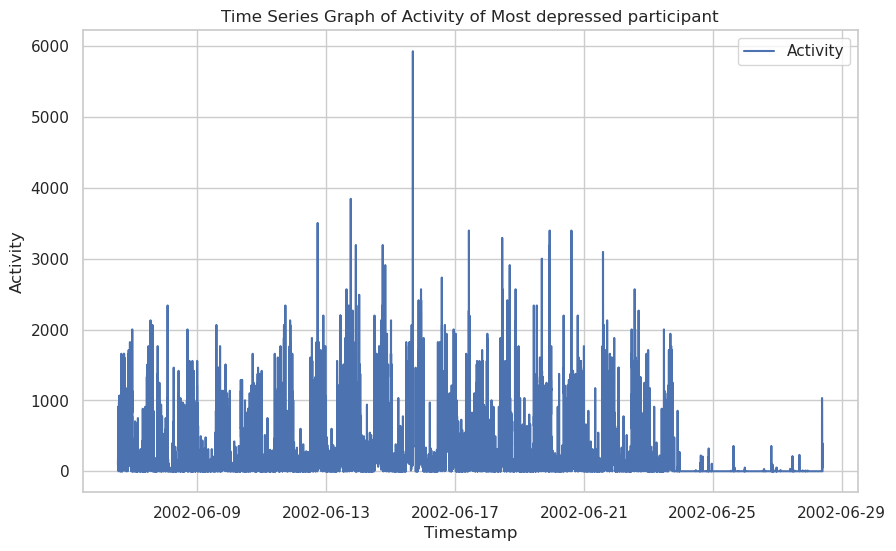

In [172]:


most_depressed_df['timestamp'] = pd.to_datetime(most_depressed_df['timestamp'])

plt.figure(figsize=(10, 6))
plt.plot(most_depressed_df['timestamp'], most_depressed_df['activity'], label='Activity')
plt.title('Time Series Graph of Activity of Most depressed participant')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()


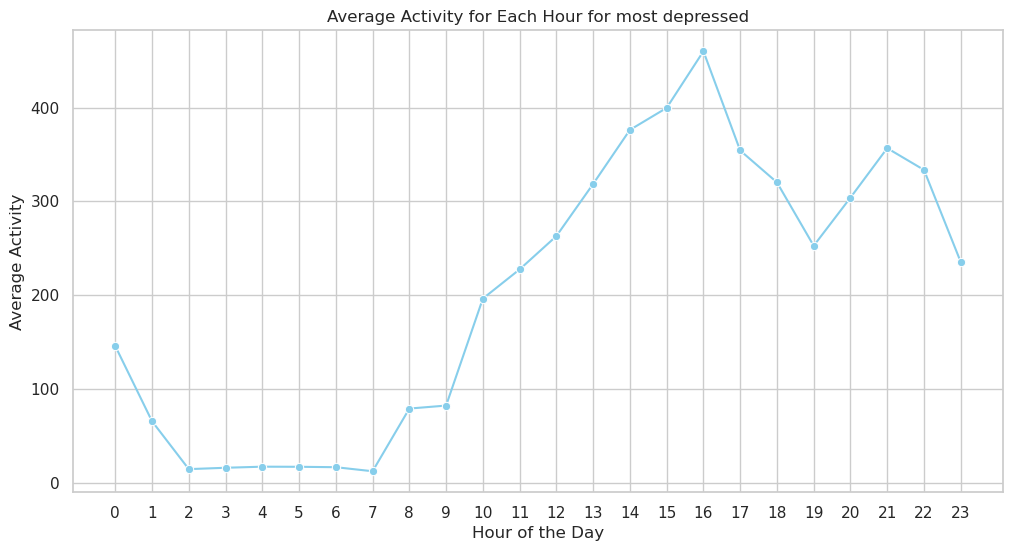

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



most_depressed_df['timestamp'] = pd.to_datetime(most_depressed_df['timestamp'])

most_depressed_df['hour'] = most_depressed_df['timestamp'].dt.hour

average_activity_by_hour = most_depressed_df.groupby('hour')['activity'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='activity', data=average_activity_by_hour, color='skyblue', marker='o')
plt.title('Average Activity for Each Hour for most depressed')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Activity')
plt.xticks(range(24))  
plt.show()


In [174]:
file_name = df_condition_cleaned.iloc[df_condition_cleaned["madrs1"].idxmin()].number +".csv"
least_depressed_df = pd.read_csv("condition/"+file_name, index_col=None)
least_depressed_df

,timestamp,date,activity
0,2005-09-22 10:00:00,2005-09-22,0
1,2005-09-22 10:01:00,2005-09-22,3
2,2005-09-22 10:02:00,2005-09-22,0
3,2005-09-22 10:03:00,2005-09-22,0
4,2005-09-22 10:04:00,2005-09-22,0
...,...,...,...
41842,2005-10-21 11:22:00,2005-10-21,0
41843,2005-10-21 11:23:00,2005-10-21,0
41844,2005-10-21 11:24:00,2005-10-21,0
41845,2005-10-21 11:25:00,2005-10-21,0


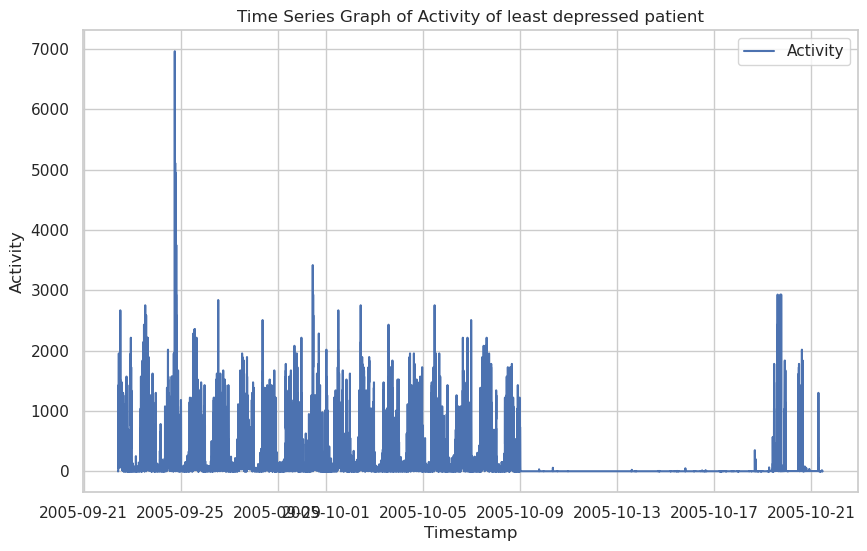

In [175]:
import pandas as pd
import matplotlib.pyplot as plt


least_depressed_df['timestamp'] = pd.to_datetime(least_depressed_df['timestamp'])

plt.figure(figsize=(10, 6))
plt.plot(least_depressed_df['timestamp'], least_depressed_df['activity'], label='Activity')
plt.title('Time Series Graph of Activity of least depressed patient')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()


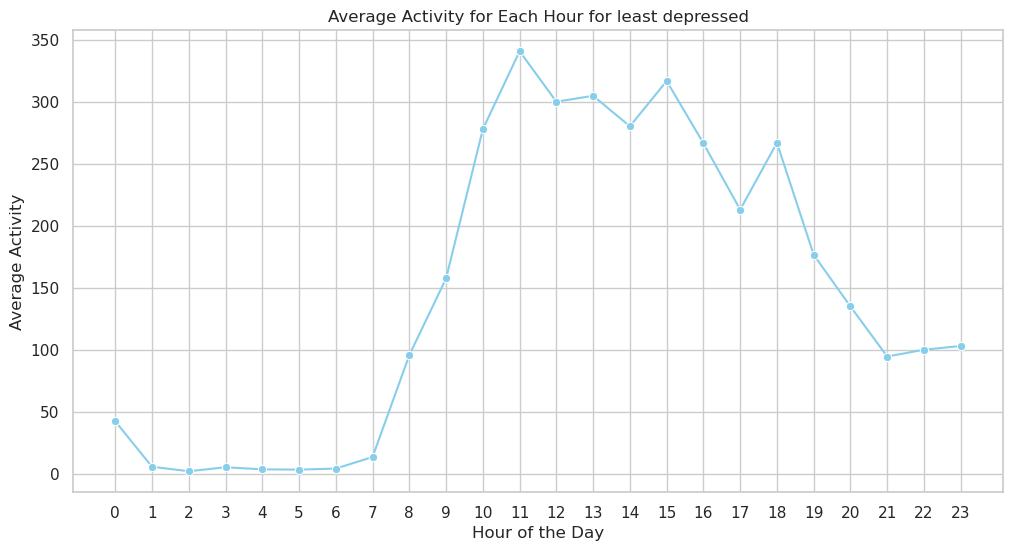

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



least_depressed_df['timestamp'] = pd.to_datetime(least_depressed_df['timestamp'])

least_depressed_df['hour'] = least_depressed_df['timestamp'].dt.hour

average_activity_by_hour = least_depressed_df.groupby('hour')['activity'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='activity', data=average_activity_by_hour, color='skyblue', marker='o')
plt.title('Average Activity for Each Hour for least depressed')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Activity')
plt.xticks(range(24))  
plt.show()


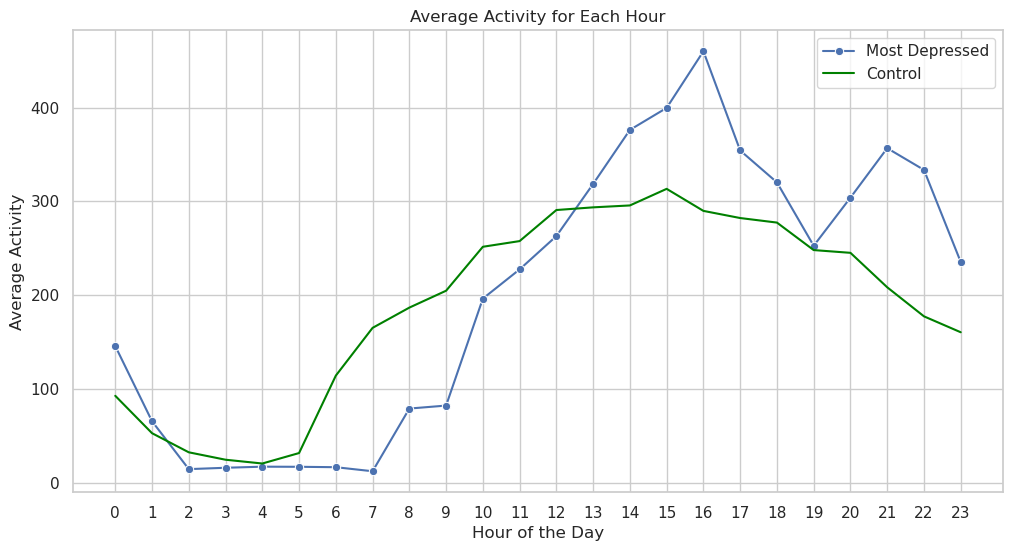

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



most_depressed_df['timestamp'] = pd.to_datetime(most_depressed_df['timestamp'])

most_depressed_df['hour'] = most_depressed_df['timestamp'].dt.hour

average_activity_most_depressed = most_depressed_df.groupby('hour')['activity'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='activity', data=average_activity_most_depressed, label='Most Depressed', marker='o')

plt.plot(hourly_average_control.index, hourly_average_control.values, label='Control', color='green')

plt.title('Average Activity for Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Activity')
plt.xticks(range(24)) 
plt.legend()
plt.show()
